<a href="https://colab.research.google.com/github/nonyeezeh/Research-Project-Code/blob/main/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparisons and plotting

In [ ]:
# Define the list of files to combine
file_names = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
]

# Initialize an empty DataFrame to store all data
combined_df = pd.DataFrame()

# Loop through each file and extract the data
for file_name in file_names:
    # Read the current file
    df = pd.read_csv(file_name)

    # Extract the column with entropy values
    entropy_column_name = df.columns[1]  # Second column name contains entropy data
    entropy_data = df[[df.columns[0], entropy_column_name]]  # Select Size and entropy column

    # If combined_df is empty, initialize it with Size column
    if combined_df.empty:
        combined_df = entropy_data
    else:
        # Merge on Size column to combine all data into a single DataFrame
        combined_df = pd.merge(combined_df, entropy_data, on='Size')

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_kl_divergence.csv', index=False)

print("Data saved to combined_kl_divergence.csv")

In [ ]:
# Load the combined K-L divergence data
combined_df = pd.read_csv('combined_kl_divergence.csv')

# Plot each column except the 'Size' column
plt.figure(figsize=(10, 6))

for column in combined_df.columns[1:]:
    plt.plot(combined_df['Size'], combined_df[column], marker='o', label=column)

# Add labels and title
plt.xlabel('Sample Size')
plt.ylabel('K-L Divergence')
plt.title('K-L Divergence for Different Models and Sample Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Rolling Avg

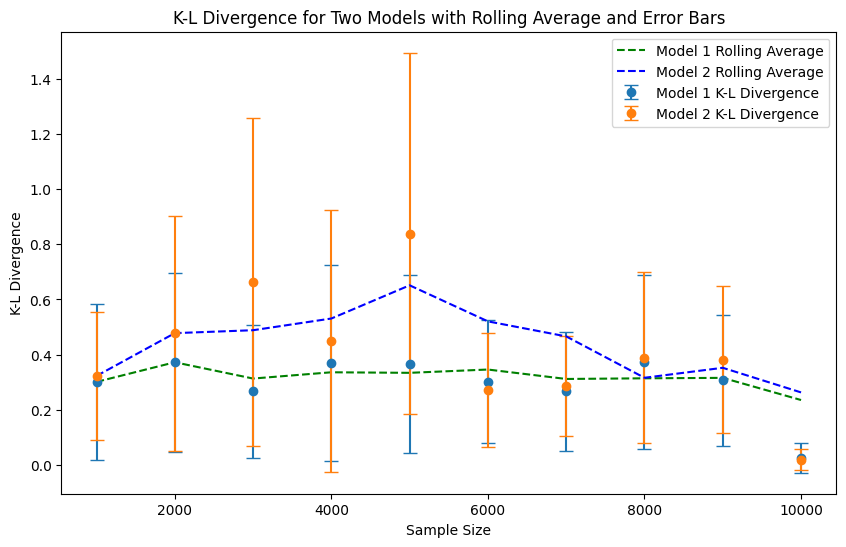

In [9]:
# Updated data with the second model's K-L divergence and STD values
data = {
    'Sample Size': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    'K-L Divergence Average 1': [0.30106, 0.37219, 0.2663, 0.36917, 0.36621, 0.30213, 0.26662, 0.37338, 0.30706, 0.02551],
    'STD Average 1': [0.28303, 0.32533, 0.24203, 0.35568, 0.32173, 0.22364, 0.21643, 0.31603, 0.23686, 0.05367],
    'K-L Divergence Average 2': [0.3226, 0.47775, 0.66465, 0.4499, 0.83865, 0.27265, 0.2865, 0.3887, 0.38125, 0.0188],
    'STD Average 2': [0.23265, 0.4254, 0.59425, 0.4743, 0.65545, 0.2074, 0.1799, 0.30915, 0.26645, 0.03825]
}

df = pd.DataFrame(data)

# Apply rolling average for both models
df['K-L Divergence (Rolling) 1'] = df['K-L Divergence Average 1'].rolling(window=3).mean().fillna(df['K-L Divergence Average 1'])
df['K-L Divergence (Rolling) 2'] = df['K-L Divergence Average 2'].rolling(window=3).mean().fillna(df['K-L Divergence Average 2'])

# Plot the graph for both models
plt.figure(figsize=(10, 6))

# Plot Model 1 with error bars and rolling average
plt.errorbar(df['Sample Size'], df['K-L Divergence Average 1'], yerr=df['STD Average 1'], fmt='o', label='Model 1 K-L Divergence', capsize=5)
plt.plot(df['Sample Size'], df['K-L Divergence (Rolling) 1'], linestyle='--', color='green', label='Model 1 Rolling Average')

# Plot Model 2 with error bars and rolling average
plt.errorbar(df['Sample Size'], df['K-L Divergence Average 2'], yerr=df['STD Average 2'], fmt='o', label='Model 2 K-L Divergence', capsize=5)
plt.plot(df['Sample Size'], df['K-L Divergence (Rolling) 2'], linestyle='--', color='blue', label='Model 2 Rolling Average')

# Labels and title
plt.xlabel('Sample Size')
plt.ylabel('K-L Divergence')
plt.title('K-L Divergence for Two Models with Rolling Average and Error Bars')
plt.legend()

# Show the plot
plt.show()